In [1]:
import pandas as pd
import datetime as dt
import pmdarima
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics import tsaplots
from dateutil.parser import parse
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
from statsmodels.tsa.arima.model import ARIMA

In [3]:
#Just update this location

fileLoc = r"ExampleOutput.csv"

In [4]:
df = pd.read_csv(fileLoc)
df.columns = ['Date','NumberofRiders']

In [5]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index('Date').asfreq('d')
df['NumberofRiders'] = df['NumberofRiders'].fillna(method='ffill')

In [6]:
df.dtypes

NumberofRiders    float64
dtype: object

In [7]:
print (df.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2021-01-22', '2021-01-23', '2021-01-24', '2021-01-25',
               '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
               '2021-01-30', '2021-01-31'],
              dtype='datetime64[ns]', name='Date', length=1858, freq='D')


In [8]:
df.tail()

,NumberofRiders
Date,
2021-01-27,353.0
2021-01-28,299.0
2021-01-29,181.0
2021-01-30,323.0
2021-01-31,228.0


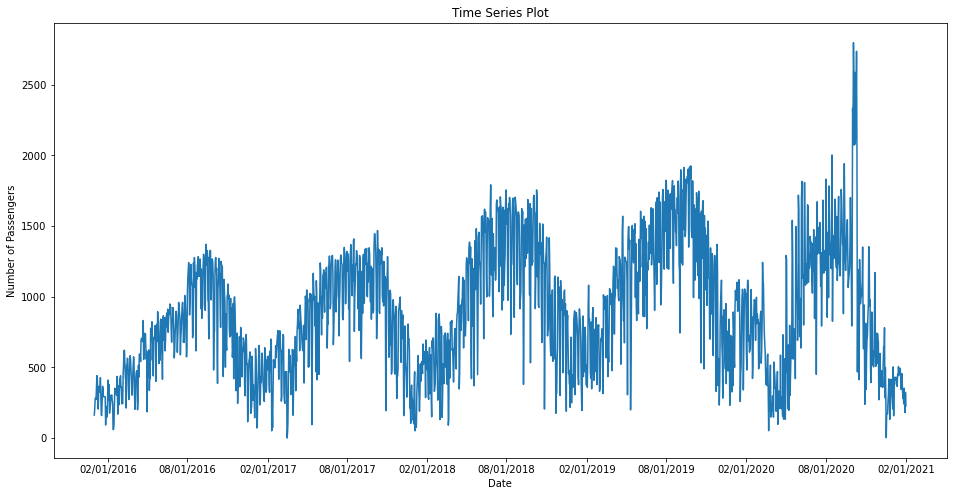

In [9]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(df.index, df["NumberofRiders"])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().set(title="Time Series Plot", xlabel="Date", ylabel="Number of Passengers")
plt.show()

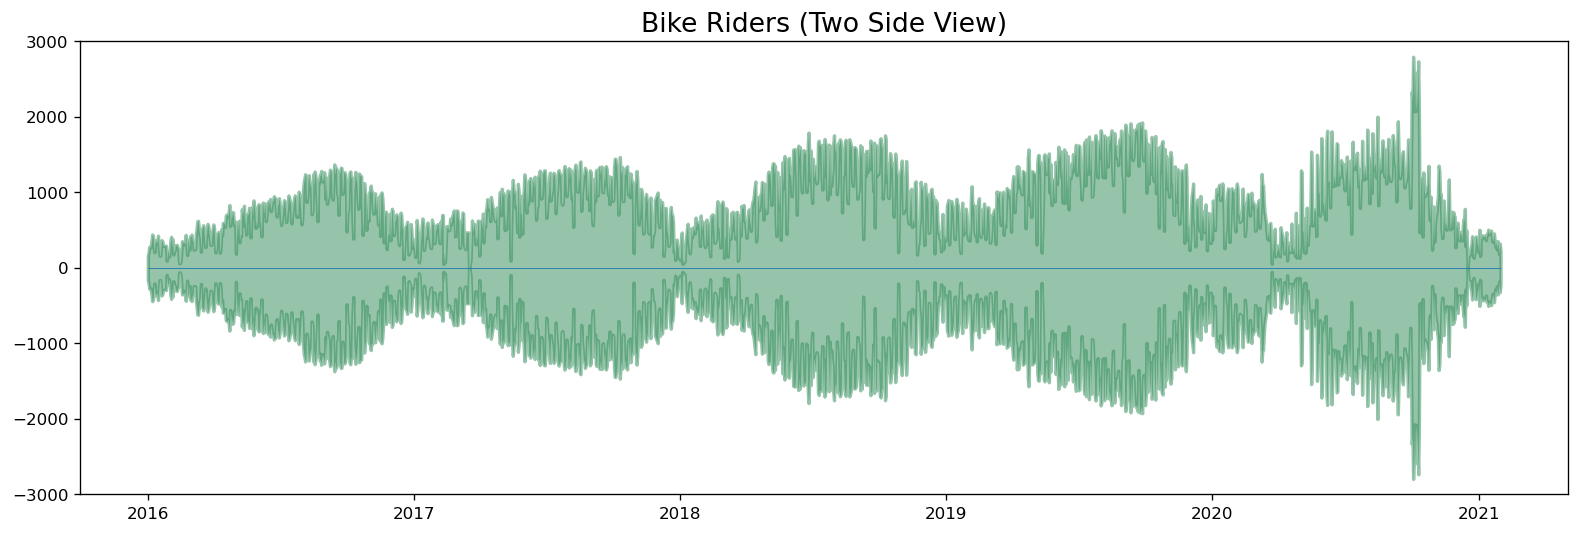

In [10]:
x = df.index.values
y1 = df['NumberofRiders'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-3000, 3000)
plt.title('Bike Riders (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
plt.show()

<Figure size 1152x864 with 0 Axes>

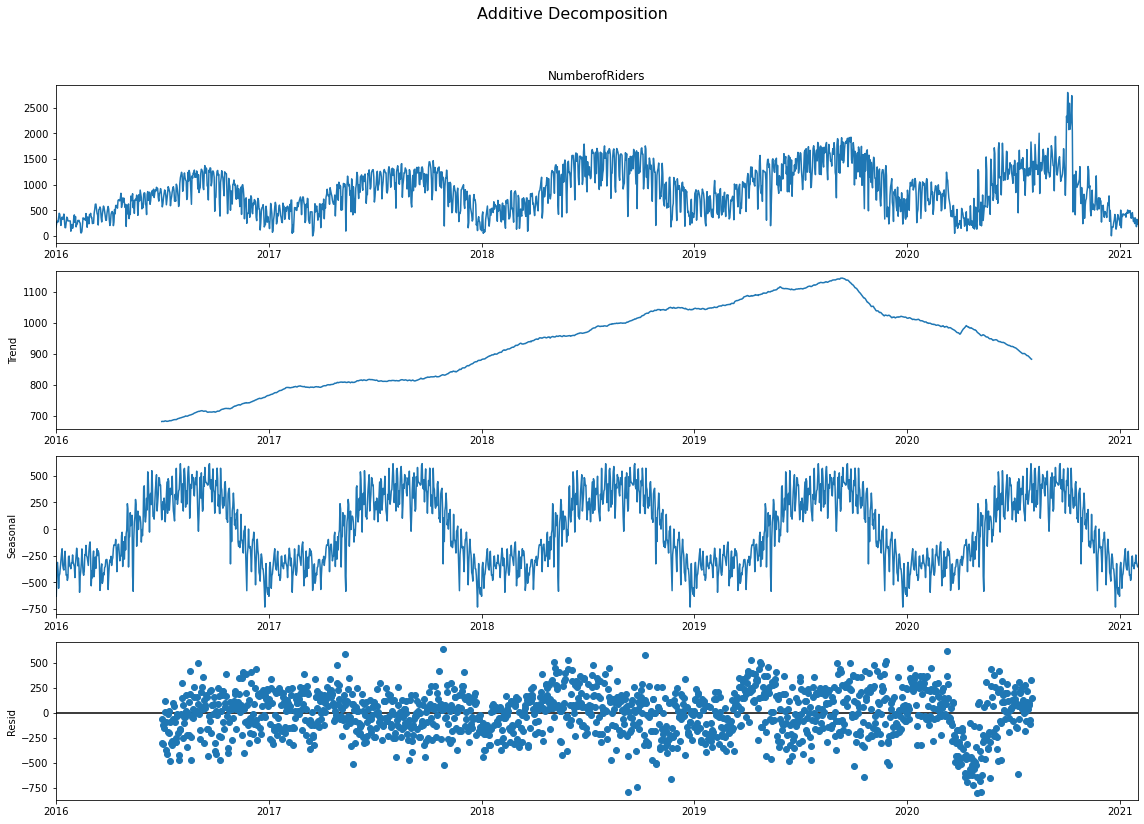

In [11]:
# Multiplicative Decomposition 
#multiplicative_decomposition = seasonal_decompose(df['NumberofRiders'], model='multiplicative', period = 365)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['NumberofRiders'], model='additive', period = 365)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
#multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

# Test For Stationarity:

In [12]:
data = df["NumberofRiders"].values
parts = int(len(data)/3)
 
# splitting the data into three parts.
part_1, part_2, part_3 = data[0:parts], data[parts:(parts*2)], data[(parts*2):(parts*3)]
 
# calculating the mean of the separated three parts of data individually.
mean_1, mean_2, mean_3 = part_1.mean(), part_2.mean(), part_3.mean()
 
# calculating the variance of the separated three parts of data individually.
var_1, var_2, var_3 = part_1.var(), part_2.var(), part_3.var()
 
# printing the mean of three groups
print('Mean1 = %f, \nMean2= %f, \nMean3 = %f' % (mean_1, mean_2, mean_3))
 
# printing the variance of three groups
print('\nVariance1 = %f, \nVariance2 = %f, \nVariance3 = %f' % (var_1, var_2, var_3))

Mean1 = 723.851373, 
Mean2= 925.537964, 
Mean3 = 1020.772213

Variance1 = 111973.754970, 
Variance2 = 173564.897993, 
Variance3 = 262604.796255


In [13]:
data = df["NumberofRiders"].values
parts = int(len(data)/4)
 
# splitting the data into three parts.
part_1, part_2, part_3, part_4 = data[0:parts], data[parts:(parts*2)], data[(parts*2):(parts*3)], data[(parts*3):(parts*4)]
 
# calculating the mean of the separated three parts of data individually.
mean_1, mean_2, mean_3, mean_4 = part_1.mean(), part_2.mean(), part_3.mean(), part_4.mean()
 
# calculating the variance of the separated three parts of data individually.
var_1, var_2, var_3, var_4 = part_1.var(), part_2.var(), part_3.var(), part_4.var()
 
# printing the mean of three groups
print('Mean1 = %f, \nMean2= %f, \nMean3 = %f, \nMean4 = %f' % (mean_1, mean_2, mean_3, mean_4))
 
# printing the variance of three groups
print('\nVariance1 = %f, \nVariance2 = %f, \nVariance3 = %f, \nVariance4 = %f' % (var_1, var_2, var_3, var_4))

Mean1 = 634.342672, 
Mean2= 898.691810, 
Mean3 = 1147.752155, 
Mean4 = 880.650862

Variance1 = 97419.548524, 
Variance2 = 135525.062347, 
Variance3 = 186239.772625, 
Variance4 = 240740.606551


#### Interpreting the output above: Looks like it is probably not stationary since the mean and variances diff on the various intervals shown. More rigourous testing below.

In [14]:
#Augmented Dickey Fuller Test

adfuller(data)

(-2.8017163328521013,
 0.058029020071883805,
 22,
 1835,
 {'1%': -3.4339186491956246,
  '5%': -2.8631163592632403,
  '10%': -2.5676091993407035},
 24909.255093784726)

In [15]:
# Method for testing if a time series is stationary or not
# Output is a graph including the original time series as well as the rolling average and rolling STD

def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window = 10).mean()
    MSTD = timeseries.rolling(window = 10).std()

    #Plot rolling statistics:
    plt.figure(figsize=(20,10))
    orig = plt.plot(timeseries, color='pink',label='Original')
    mean = plt.plot(MA, color='b', label='Rolling Mean')
    std = plt.plot(MSTD, color='g', label = 'Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend(loc='best')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfout = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfout['Critical Value (%s)'%key] = value
    print(dfout)

## Interpreting Above Output

##### Test Statistic: -2.8325
##### P-value: 0.05378

##### Since the P-value is not less than .05, we fail to reject the null hypothesis. This means the time series is not stationary! So we have to find what time dependant structure that doesnt have constant variance over time. But it is so close lets do another test first.

# Differencing

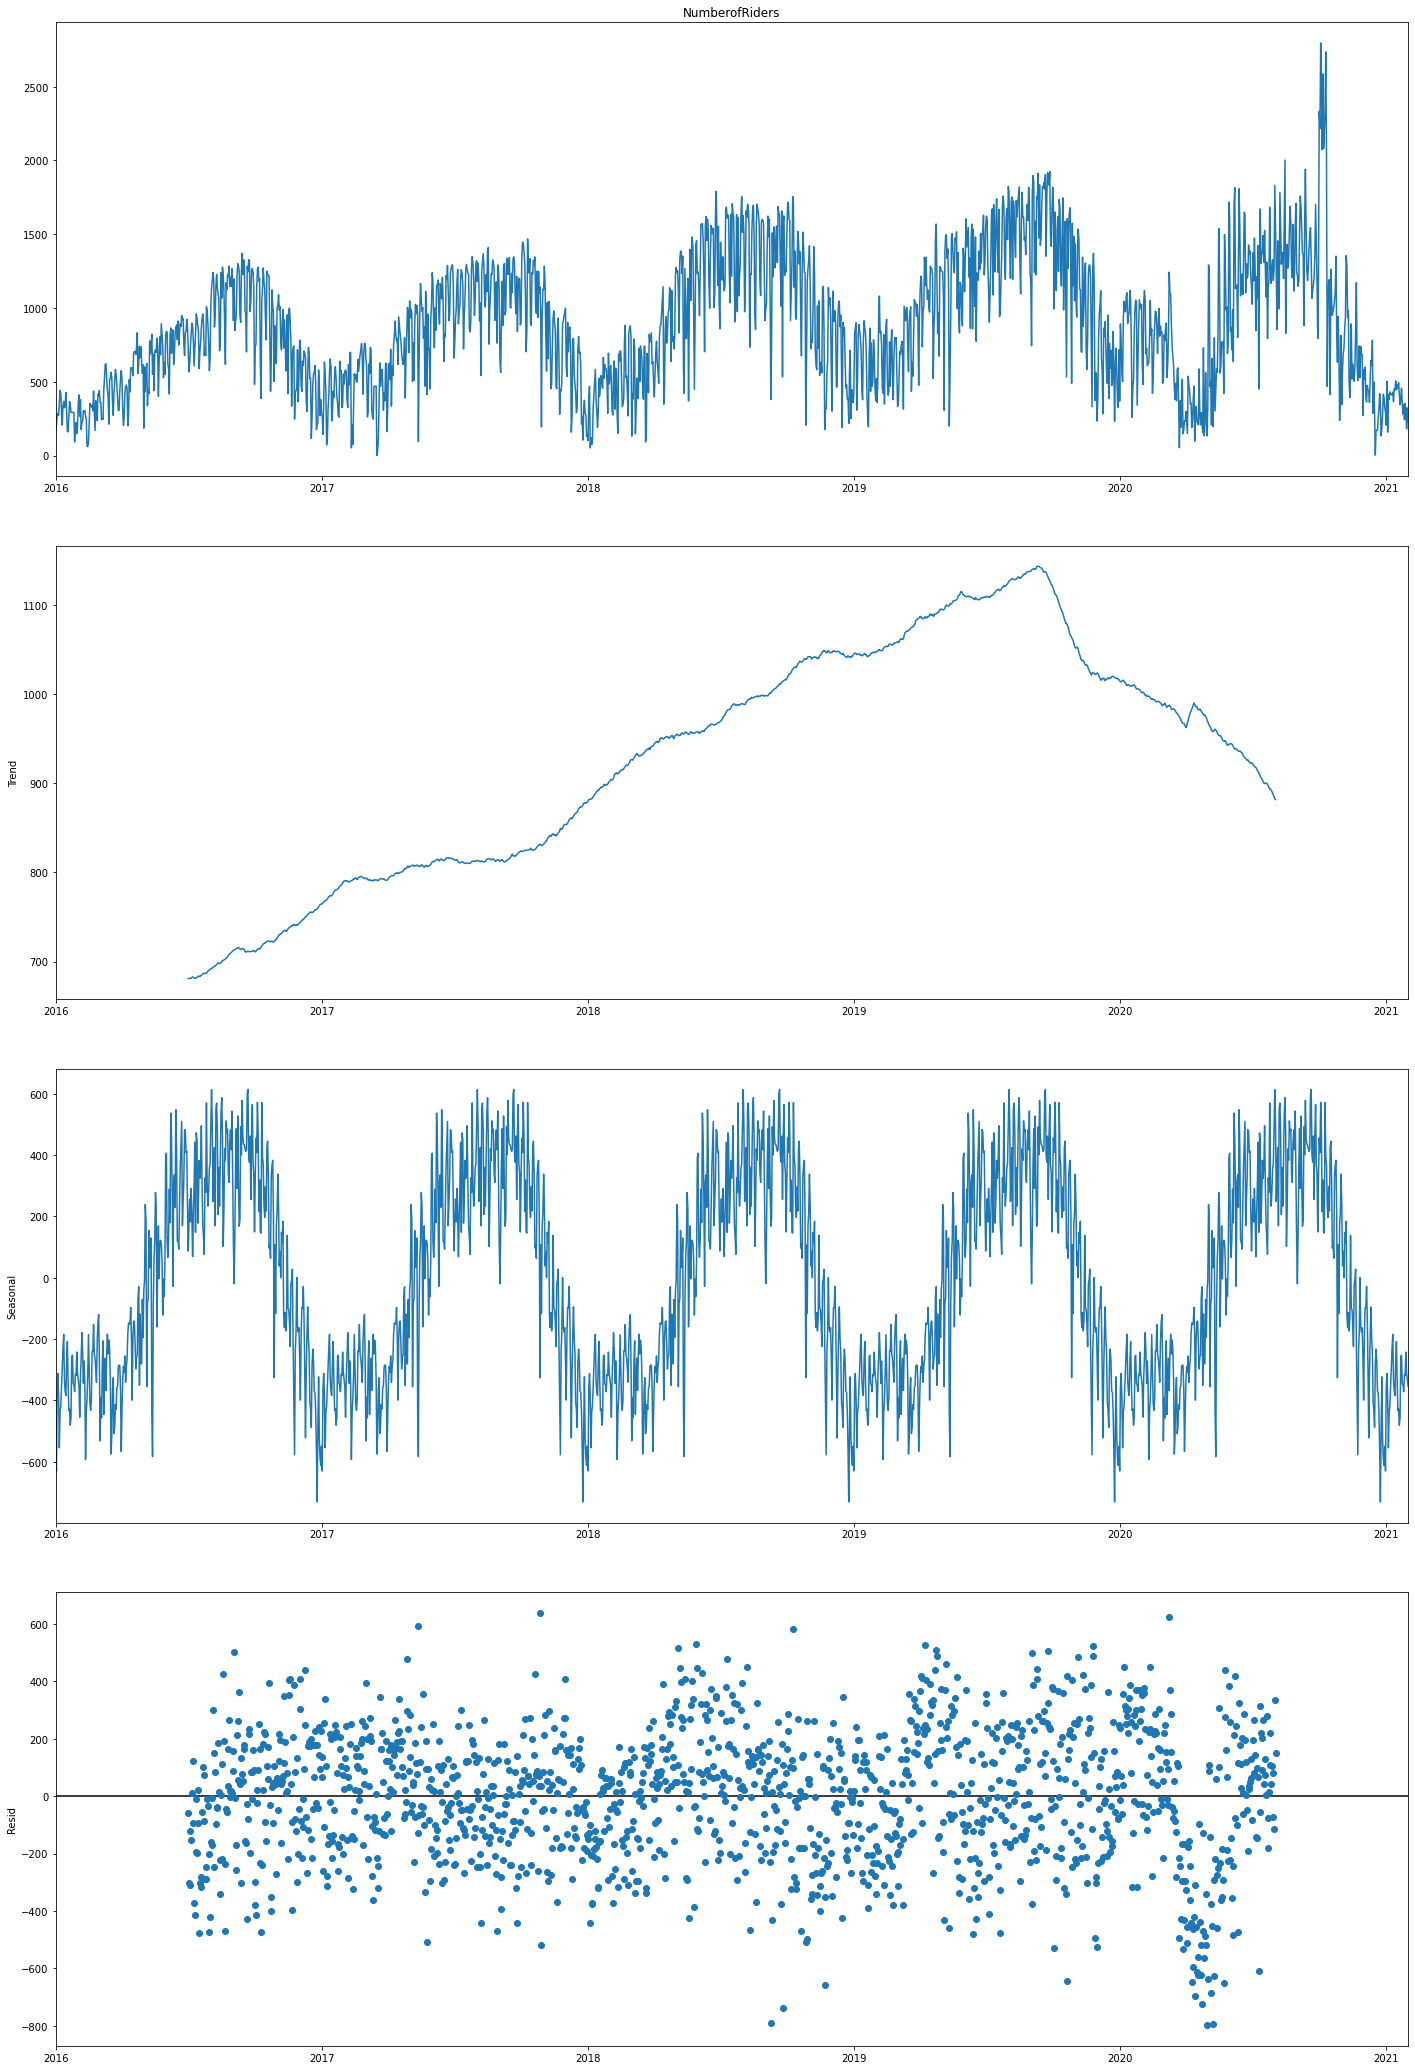

In [16]:
decomp = seasonal_decompose(df["NumberofRiders"], period=365)
f = decomp.plot()
f.set_figwidth(20)
f.set_figheight(30)
f.show()

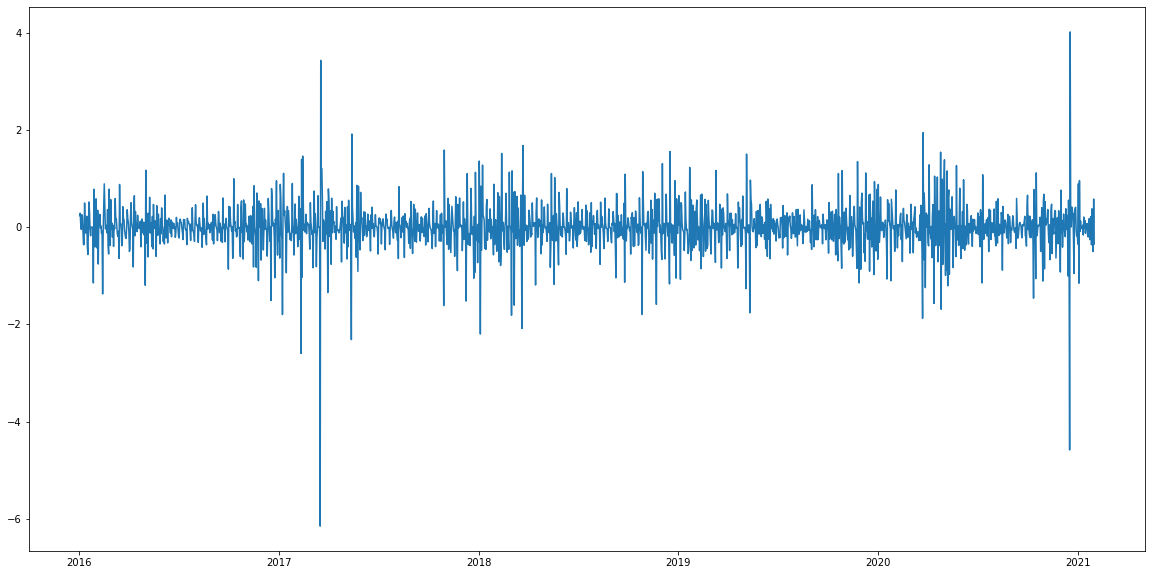

In [17]:
ts_log=np.log(df["NumberofRiders"])
plt.figure(figsize=(20,10))
ts_log_diff=ts_log-ts_log.shift()
plt.plot(ts_log_diff)

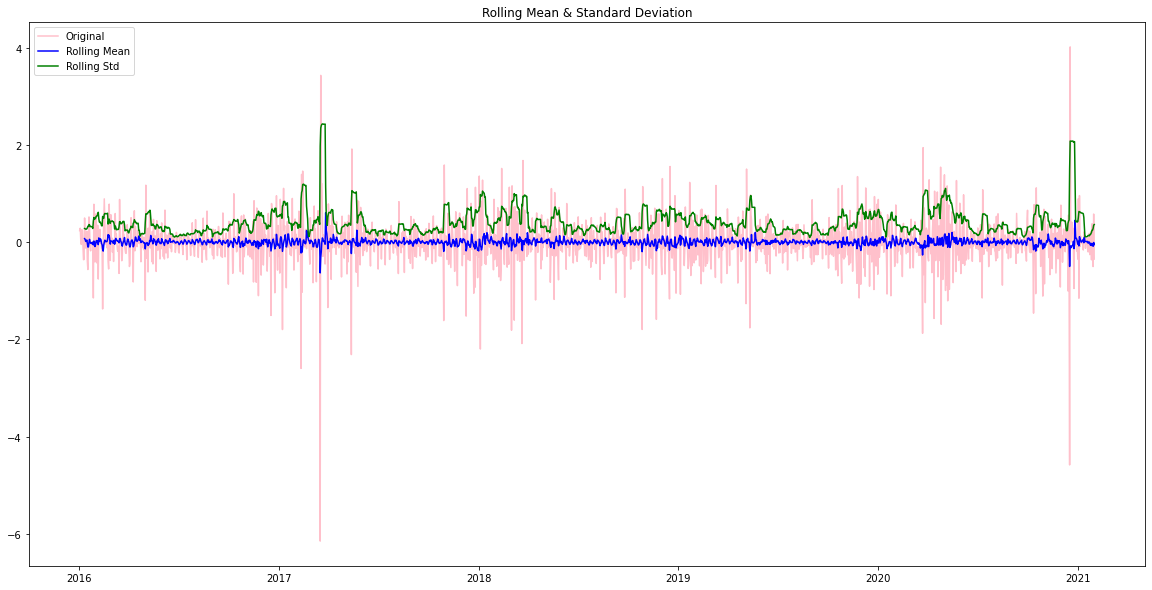

Results of Dickey-Fuller Test:
Test Statistic                -1.064533e+01
p-value                        4.812261e-19
#Lags Used                     2.500000e+01
Number of Observations Used    1.831000e+03
Critical Value (1%)           -3.433926e+00
Critical Value (5%)           -2.863120e+00
Critical Value (10%)          -2.567611e+00
dtype: float64


In [18]:
ts_log_diff.dropna(inplace=True)
#print(ts_log_diff)
df.isnull().sum()
test_stationarity(ts_log_diff)

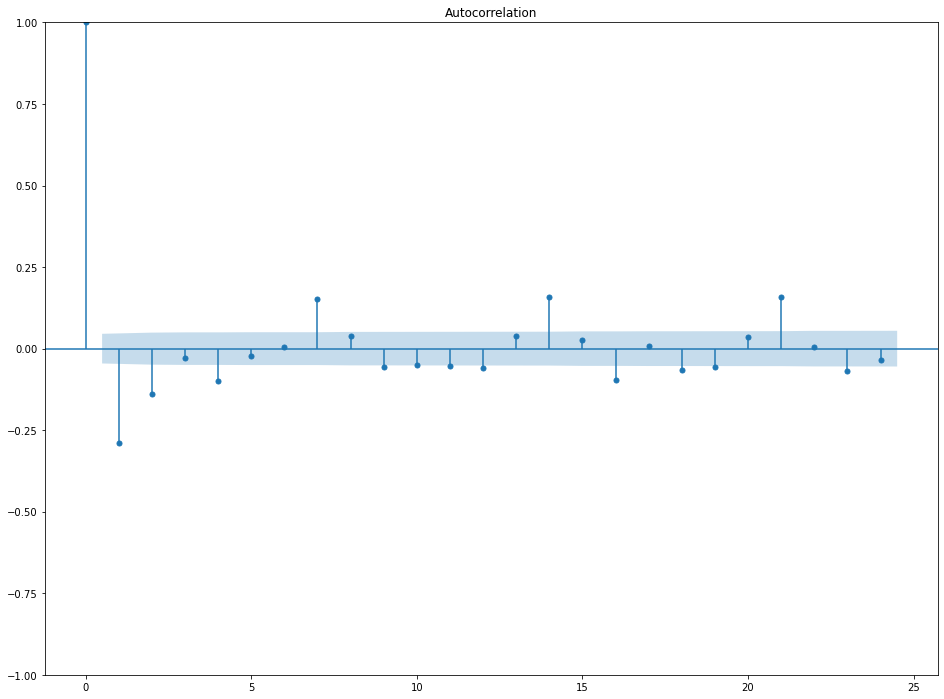

<Figure size 1440x720 with 0 Axes>

In [19]:
# Display the autocorrelation plot of the time series
tsaplots.plot_acf(ts_log_diff, lags=24 )
plt.figure(figsize=(20,10))
plt.show()

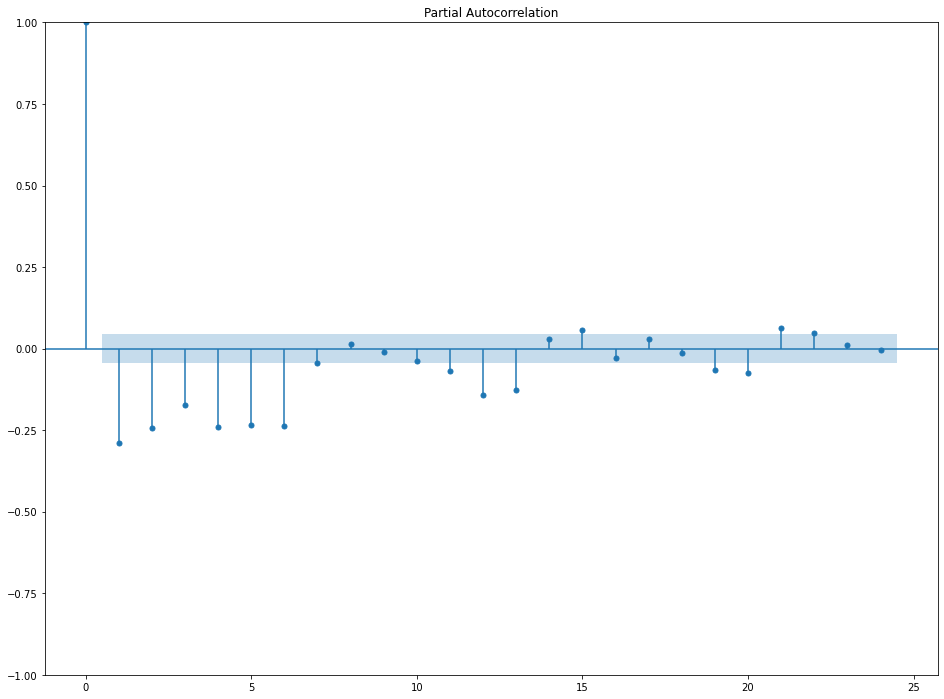

<Figure size 1440x720 with 0 Axes>

In [20]:
# Display the partial autocorrelation plot of the time series
tsaplots.plot_pacf(ts_log_diff, lags=24 )
plt.figure(figsize=(20,10))
plt.show()

In [26]:
# Looking for best fit SARIMA model.
model = auto_arima(data,seasonal=True, m=12, max_order=6, stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=25561.281, Time=6.31 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=26177.724, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=26037.493, Time=1.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=25801.896, Time=1.87 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=26175.724, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=25562.448, Time=4.98 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=25568.982, Time=5.42 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=25557.046, Time=25.47 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=25555.120, Time=21.62 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=25582.049, Time=9.16 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=25575.927, Time=12.54 sec
 ARIMA(3,1,2)(2,0,0)[12] intercept   : AIC=25579.033, Time=22.87 sec
 ARIMA(2,1,3)(2,0,0)[12] intercept   : AIC=25356.624, Time=25.48 sec
 ARIMA(2,1,3)(1,0,0)[12] intercept   : AIC=25357.759, Time=6.41 sec


<bound method NDFrame.head of             NumberofRiders
Date                      
2020-04-28           562.0
2020-04-29           261.0
2020-04-30           133.0
2020-05-01           323.0
2020-05-02          1292.0
...                    ...
2021-01-27           353.0
2021-01-28           299.0
2021-01-29           181.0
2021-01-30           323.0
2021-01-31           228.0

[279 rows x 1 columns]>


<AxesSubplot:xlabel='Date'>

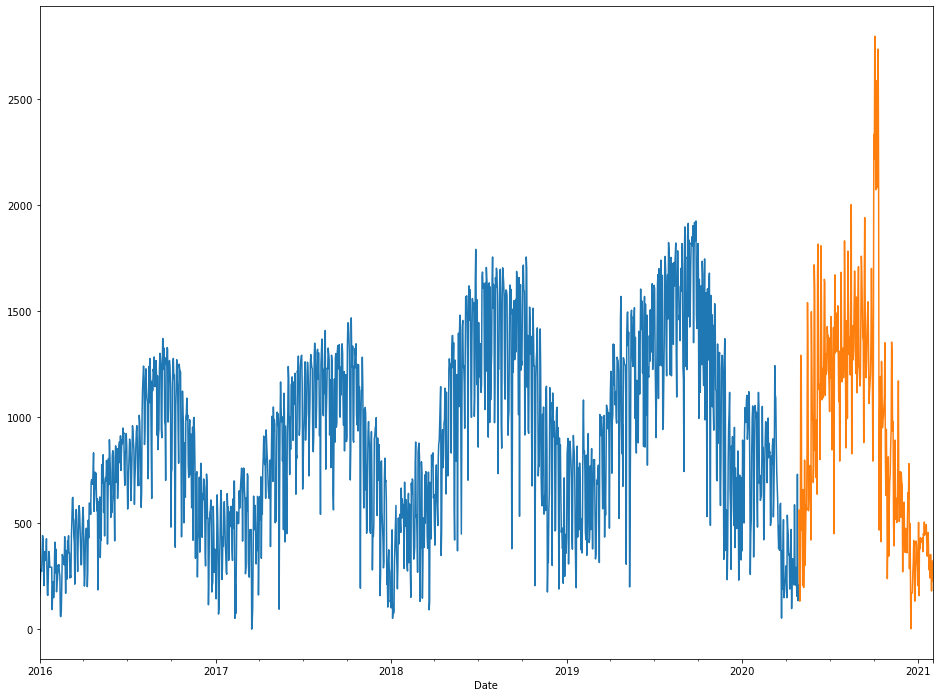

In [28]:
train = df[:int(0.85*(len(df)))]
test = df[int(0.85*(len(df))):]
print(test.head)
#plotting the data
train['NumberofRiders'].plot()
test['NumberofRiders'].plot()

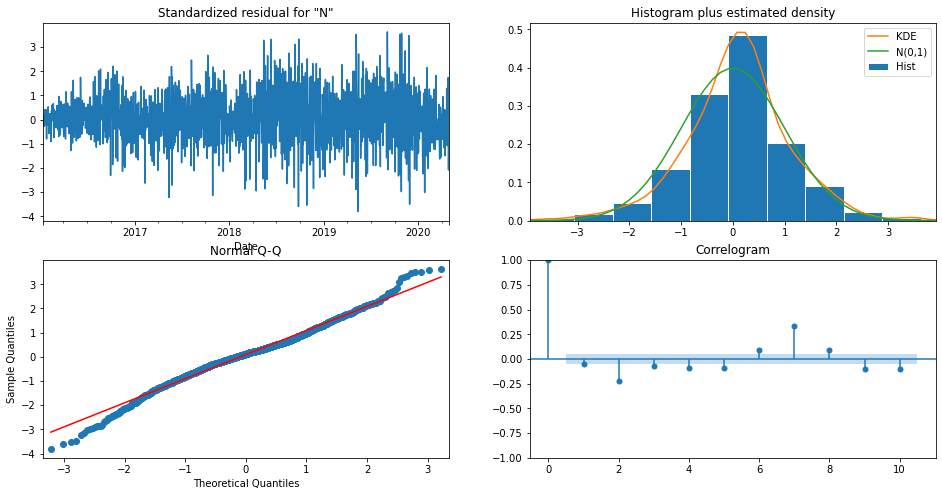

In [37]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('modeldiagnostics')
plt.show()

# Looks normal in Q-Q plot. Correlogram looks like no autocorrelation in residuals. 
# Histogram looks like residuals are relatively normally distributed.

<AxesSubplot:xlabel='Date'>

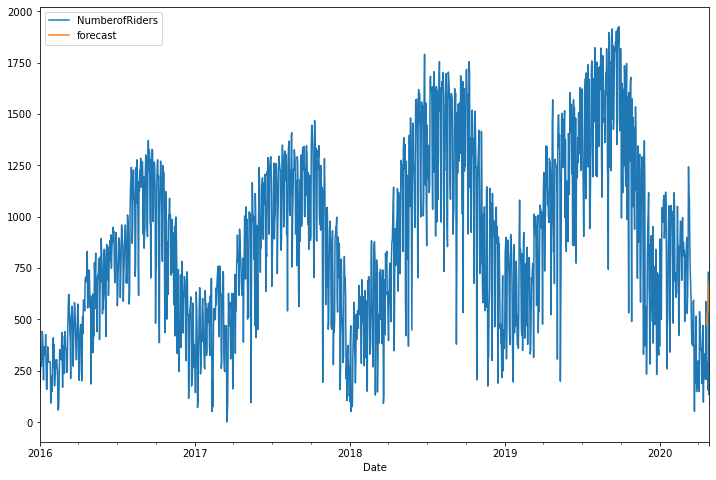

In [39]:
testing = pd.DataFrame(data=df['NumberofRiders'])
train2 = testing[:int(0.85*(len(testing)))]
test2 = testing[int(0.85*(len(testing))):]
train2['forecast']=results.predict(start = 1572, end = 1850 ,dynamic=True)
train2[['NumberofRiders','forecast']].plot(figsize=(12,8))

In [40]:
from sklearn.metrics import r2_score
print('R2score is',r2_score(test['NumberofRiders'], mean))
mean_absolute_percentage_error = np.mean(np.abs(mean - test['NumberofRiders'])/np.abs(test['NumberofRiders']))*100
print('MAPE is', mean_absolute_percentage_error)

R2score is -0.03317044563434335
MAPE is 168.61251115743377


## AR Forecasting

In [42]:
resultsDict = {}
predictionsDict = {}

In [43]:
# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(train)
yhat = list()
for t in tqdm(range(len(test))):
    temp_train = df[:len(train)+t]
    model = AutoReg(temp_train.NumberofRiders, lags=10)
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
predictionsDict['AR'] = yhat.values


100%|██████████| 279/279 [00:01<00:00, 163.90it/s]


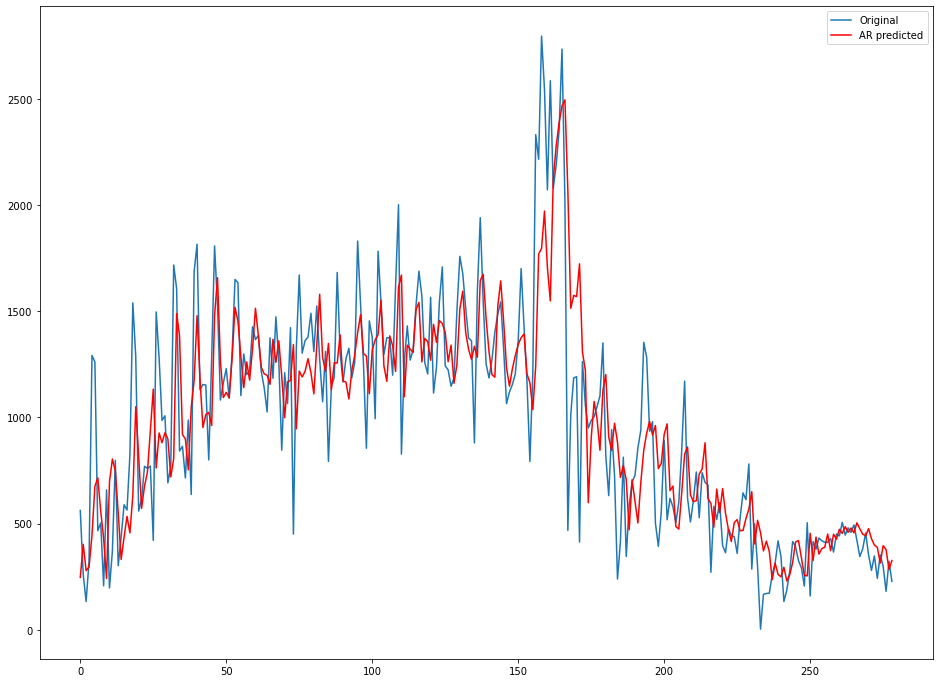

In [44]:
plt.plot(test.NumberofRiders.values, label='Original')
plt.plot(yhat.values, color='red', label='AR predicted')
plt.legend()

## MA Forecasting

In [45]:
from statsmodels.tsa.arima.model import ARIMA
#model = ARIMA(df.NumberofRiders, order=(4,1,0),seasonal_order=(2,1,1,12))

In [46]:
# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(train)
yhat = list()
for t in tqdm(range(len(test))):
    temp_train = df[:len(train)+t]
    model = ARIMA(temp_train.NumberofRiders, order=(1,0,0))
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
predictionsDict['MA'] = yhat.values

100%|██████████| 279/279 [00:27<00:00, 10.26it/s]


In [53]:
x = np.arange(1579, 1858, 1, dtype = int)
x2 = np.arange(0, 1858, 1, dtype = int)

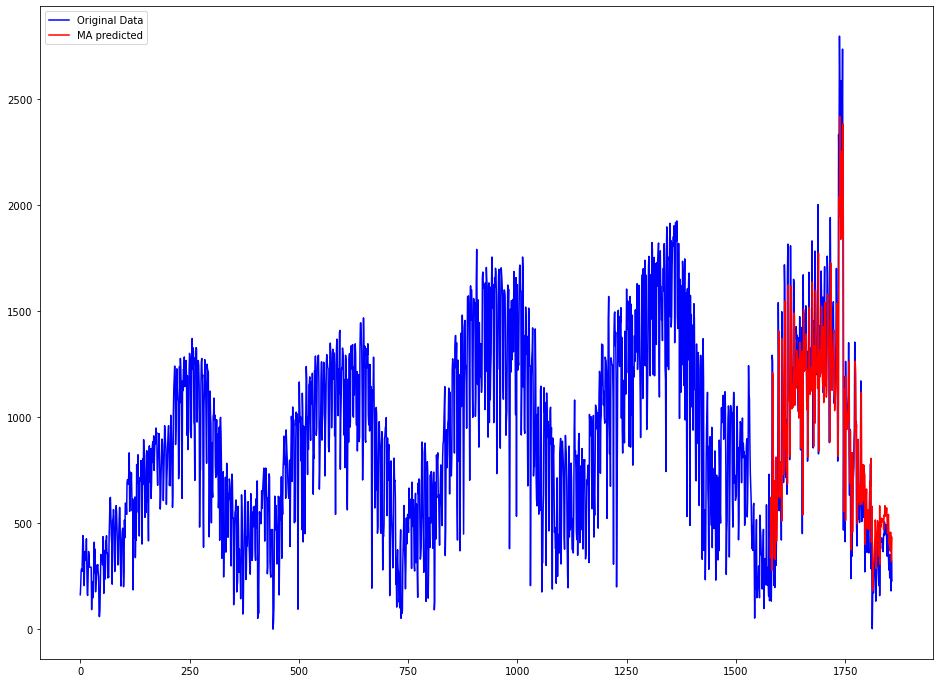

In [54]:
#plt.plot(test.NumberofRiders.values, label='Original')
plt.plot(x2, df["NumberofRiders"], color = 'blue',label='Original Data')
plt.plot(x, yhat.values, color='red', label='MA predicted')
plt.legend()

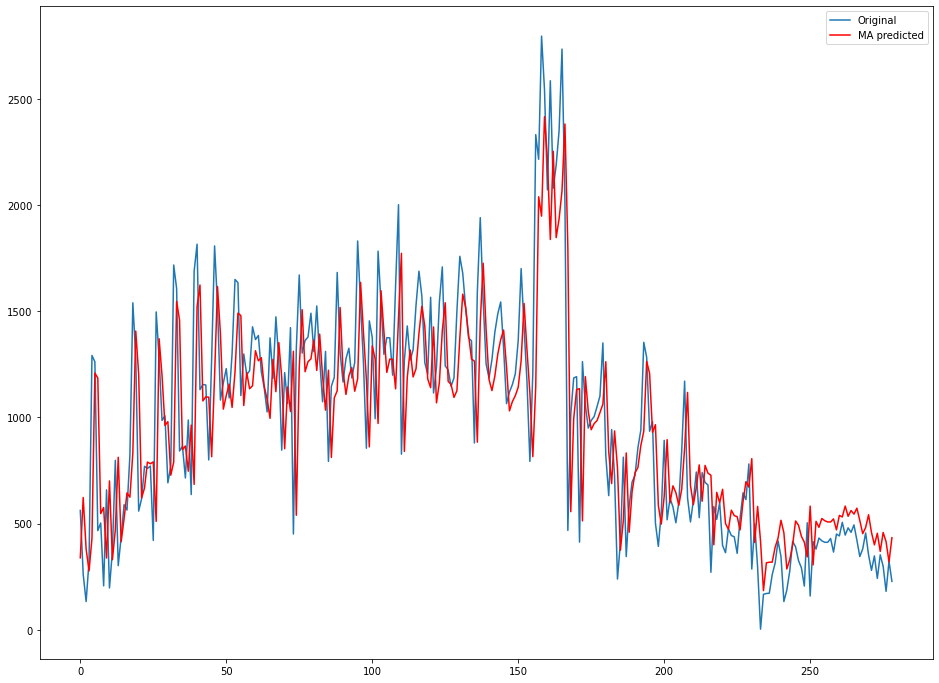

In [55]:
plt.plot(test.NumberofRiders.values, label='Original')
plt.plot(yhat.values, color='red', label='MA predicted')
plt.legend()

## Autoregressive Moving Average Forecasting

In [56]:
# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(train)
yhat = list()
for t in tqdm(range(len(test))):
    temp_train = df[:len(train)+t]
    model = ARIMA(temp_train.NumberofRiders, order=(1,1,0))
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
predictionsDict['ARMA'] = yhat.values

100%|██████████| 279/279 [00:15<00:00, 18.11it/s]


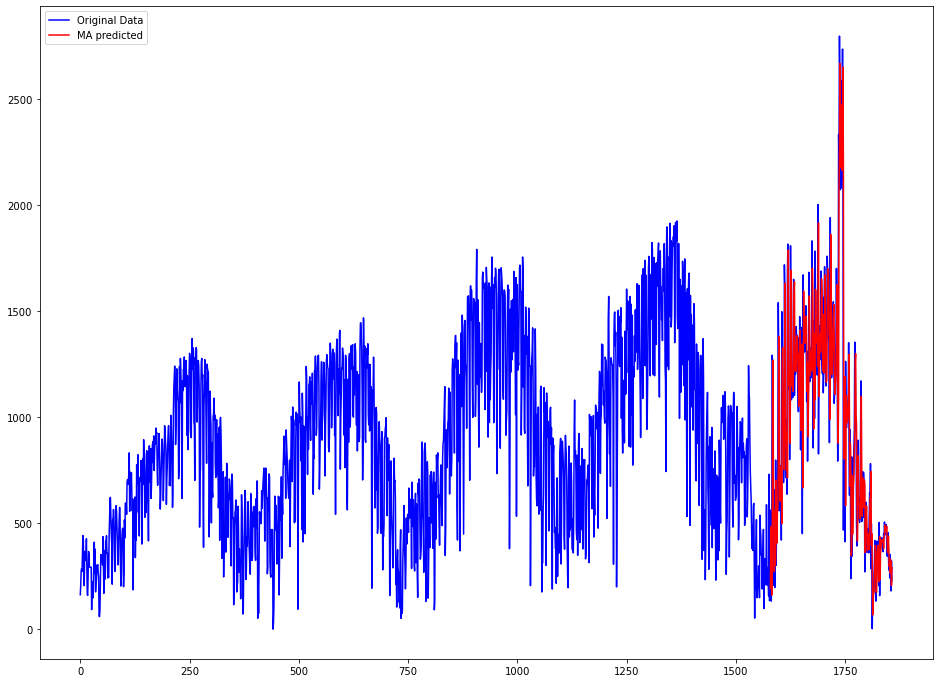

In [57]:
#plt.plot(test.NumberofRiders.values, label='Original')
plt.plot(x2, df["NumberofRiders"], color = 'blue',label='Original Data')
plt.plot(x, yhat.values, color='red', label='MA predicted')
plt.legend()

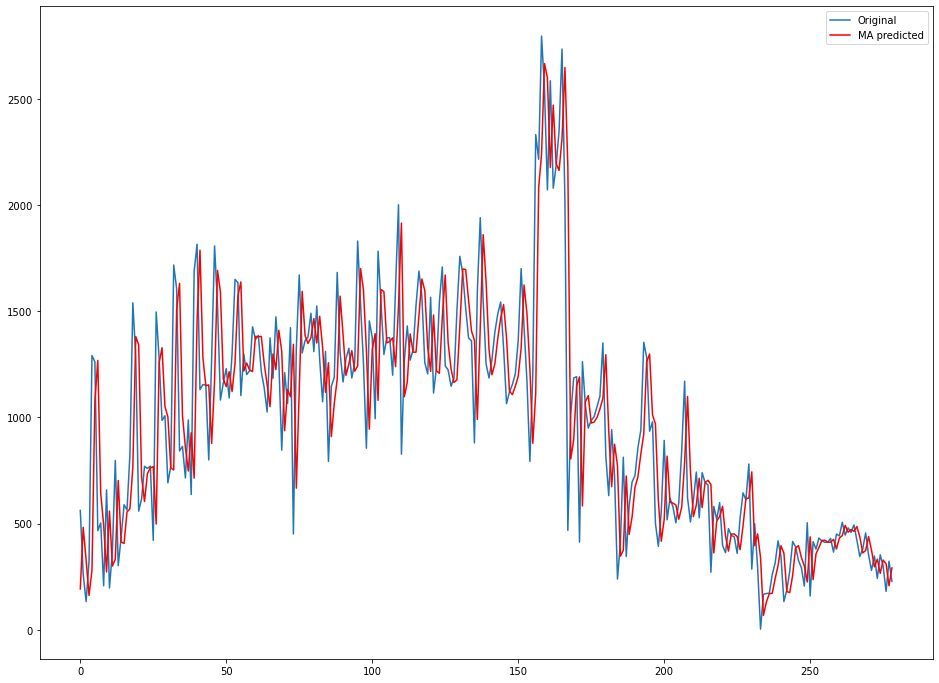

In [58]:
plt.plot(test.NumberofRiders.values, label='Original')
plt.plot(yhat.values, color='red', label='MA predicted')
plt.legend()

## Seasonal Autoregressive Integrated Moving Average (SARIMA) Forecasting

#### Using the results of the autosarima function ran above, one of the best model was SARIMAX(2, 0, 0)x(1, 0, 0, 12)  

In [62]:
# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(train)
yhat = list()
for t in tqdm(range(len(test))):
    temp_train = df[:len(train)+t]
    model = ARIMA(temp_train.NumberofRiders, order=(2,0,0), seasonal_order=(1,0,0,12))
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
predictionsDict['ARMA'] = yhat.values

100%|██████████| 279/279 [07:19<00:00,  1.58s/it]


In [36]:
model = SARIMAX(train['NumberofRiders'],order=(2,0,0),seasonal_order=(2,1,1,12))
results = model.fit()
print("Results of SARIMAX on train")
print(results.summary())

Results of SARIMAX on train
                                      SARIMAX Results                                       
Dep. Variable:                       NumberofRiders   No. Observations:                 1579
Model:             SARIMAX(2, 0, 0)x(2, 1, [1], 12)   Log Likelihood              -10889.295
Date:                              Sun, 11 Dec 2022   AIC                          21790.590
Time:                                      18:45:33   BIC                          21822.731
Sample:                                  01-01-2016   HQIC                         21802.538
                                       - 04-27-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6899      0.022     30.684      0.000       0.646    

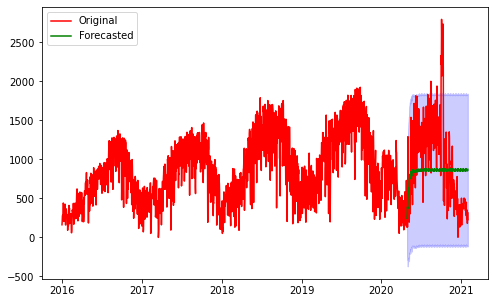

In [38]:
#Checking prediction value with test
forecast = results.get_forecast(steps=len(test))
mean = forecast.predicted_mean
conf_int = forecast.conf_int()
d = test.index
plt.figure(figsize=(8,5))
# Plot past  levels
plt.plot(df.index, df['NumberofRiders'], label='Original', color = 'red')
# Prediction Mean
plt.plot(d, mean, label='Forecasted', color= 'green')
# Shade of space between  confidence intervals
plt.fill_between(d, conf_int.iloc[:,0], conf_int.iloc[:,1],
alpha=0.2, color= 'blue')
# Plot legend 
plt.legend()
plt.show()

## Below is the model using the best result from auto arima. As you can see it was not that good which is why we showed the best model above.

In [ ]:
model = SARIMAX(train['NumberofRiders'],order=(4,0,0),seasonal_order=(2,1,1,12))
results = model.fit()
print("Results of SARIMAX on train")
print(results.summary())

In [ ]:
#Checking prediction value with test
forecast = results.get_forecast(steps=len(test))
mean = forecast.predicted_mean
conf_int = forecast.conf_int()
d = test.index
plt.figure(figsize=(8,5))
# Plot past  levels
plt.plot(df.index, df['NumberofRiders'], label='Original', color = 'red')
# Prediction Mean
plt.plot(d, mean, label='Forecasted', color= 'green')
# Shade of space between  confidence intervals
plt.fill_between(d, conf_int.iloc[:,0], conf_int.iloc[:,1],
alpha=0.2, color= 'blue')
# Plot legend 
plt.legend()
plt.show()